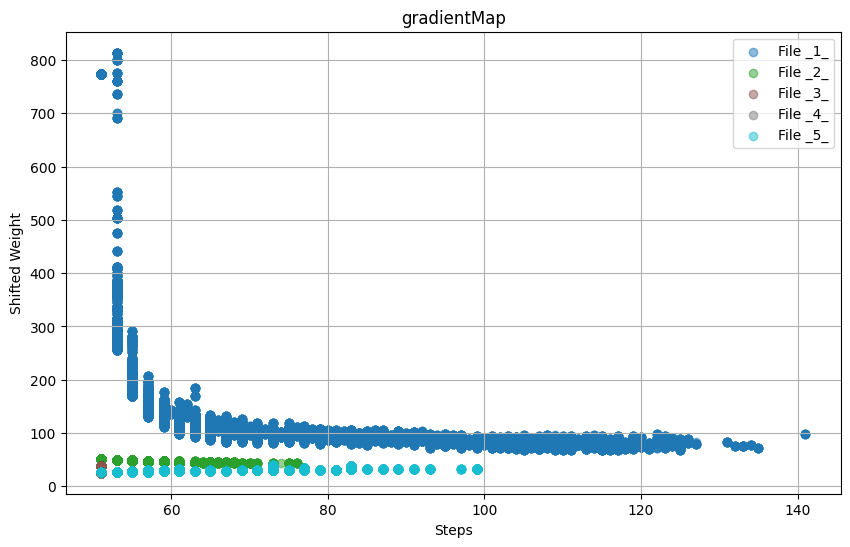

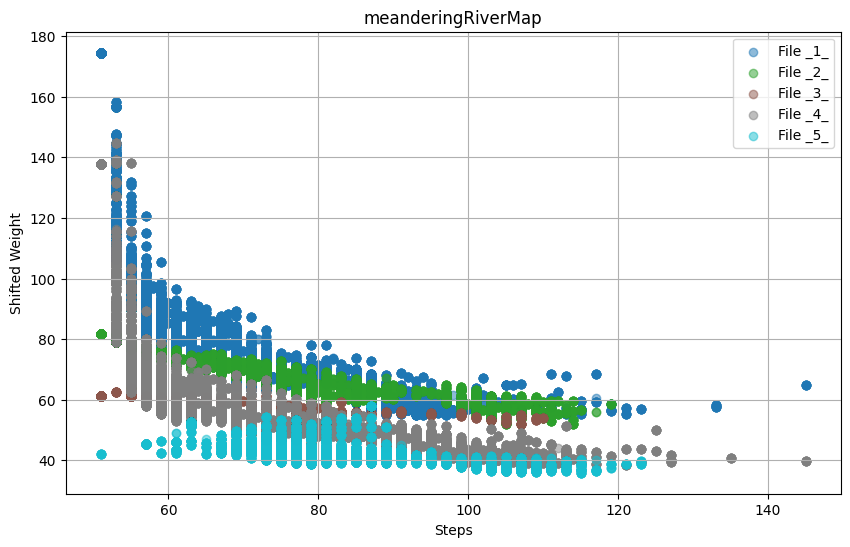

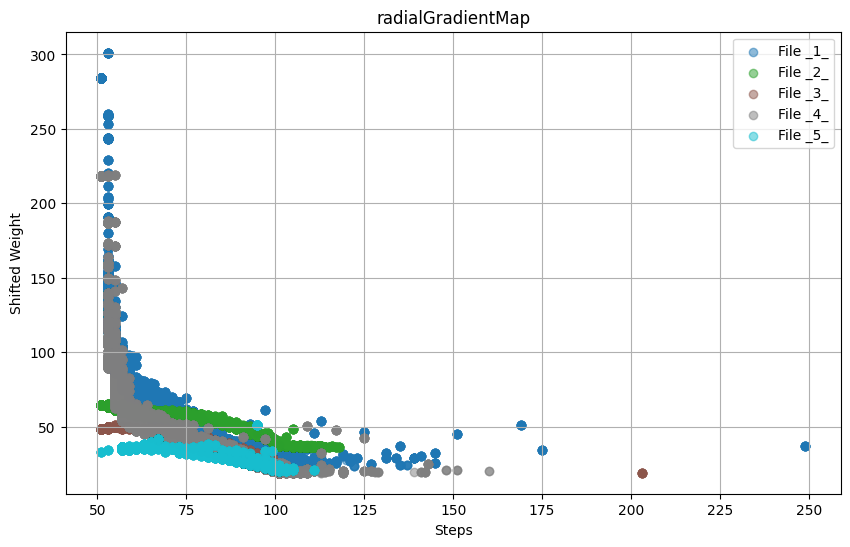

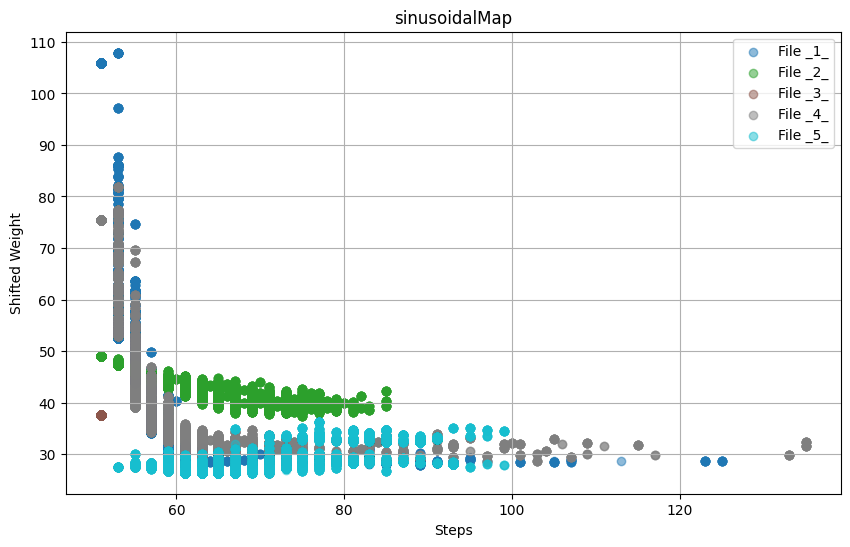

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# Define the directory containing the CSV files
directory = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/data_analysis/GD_Calc_Data_Last_10_Rows'

# Define the map types and the file suffixes
map_types = ['gradientMap', 'meanderingRiverMap', 'radialGradientMap', 'sinusoidalMap']
suffixes = ['_1_', '_2_', '_3_', '_4_', '_5_']
special_suffix = 'objective_values.csv'

# Define a colormap
colors = plt.get_cmap('tab10', len(suffixes))

# Iterate over each map type and create a separate plot
for map_type in map_types:
    # Create a new figure for each map type
    plt.figure(figsize=(10, 6))
    
    for i, suffix in enumerate(suffixes):
        # Construct the filename patterns
        filename_data = f"{map_type}{suffix}objective_values.csv"
        filename_special = f"{map_type}{special_suffix}"
        
        # Check for the regular filename
        file_path = os.path.join(directory, filename_data)
        if os.path.exists(file_path):
            # Read the CSV file
            data = pd.read_csv(file_path)
            # Extract color and set alpha to 0.5 for transparency
            color_with_alpha = colors(i, alpha=0.5)
            # Plot the data with different colors and transparency
            plt.scatter(data['Steps'], data['Shifted Weight'], label=f'File {suffix}', color=color_with_alpha)
        else:
            print(f"File {file_path} does not exist")

    # Customize and show the plot
    plt.title(map_type)
    plt.xlabel('Steps')
    plt.ylabel('Shifted Weight')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


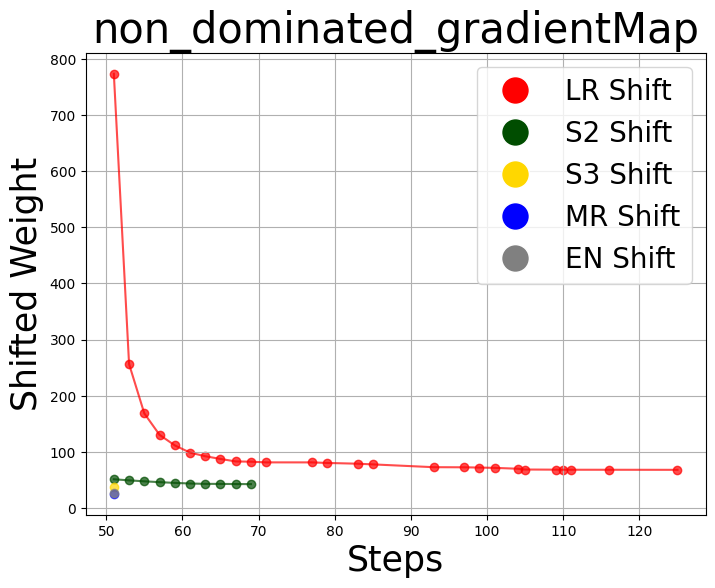

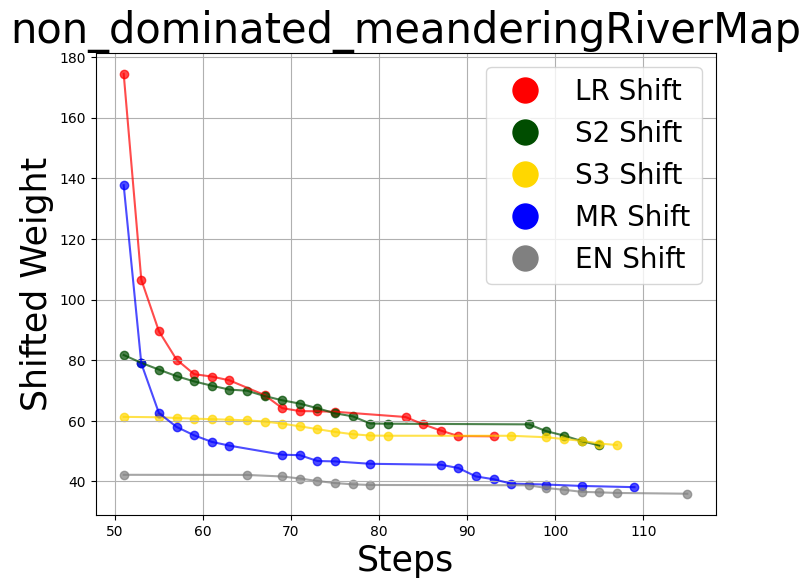

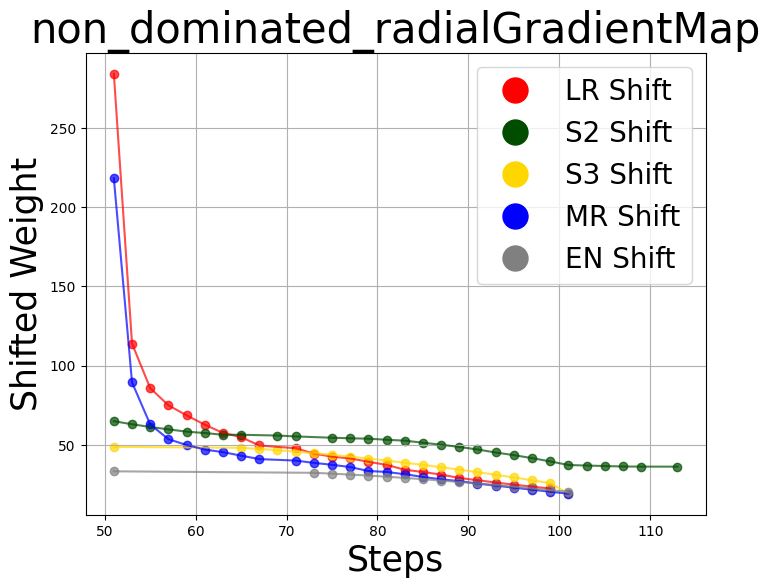

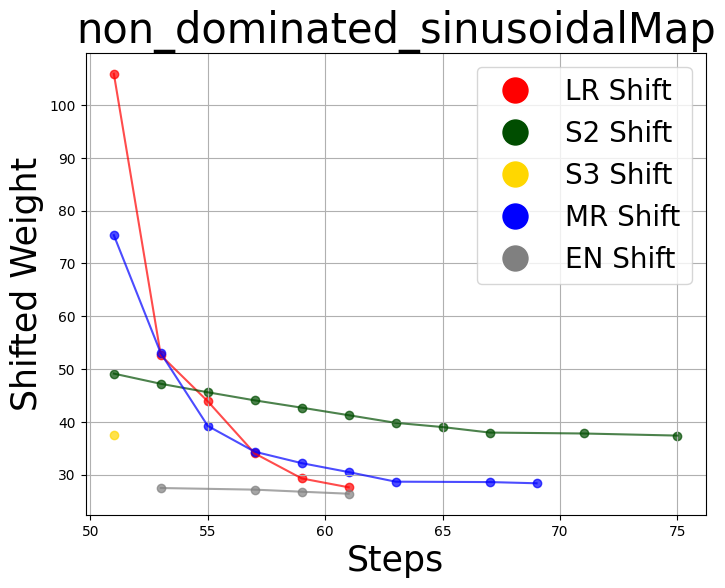

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.lines import Line2D

# Define the directory containing the CSV files
directory = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/data_analysis/non_dominated_True_Pareto_Fronts'

# Define the map types and the file suffixes
map_types = ['non_dominated_gradientMap', 'non_dominated_meanderingRiverMap', 'non_dominated_radialGradientMap', 'non_dominated_sinusoidalMap']
suffixes = ['_1_', '_2_', '_3_', '_4_', '_5_']
special_suffix = 'objective_values.csv'

# Define the color list
colors = ['#FF0000', '#004d00', '#FFD700', '#0000FF', '#808080']  # Red, Dark Green, Dark Yellow, Blue, Gray

# Define the suffix to name mapping
suffix_to_name = {
    '_1_': 'LR Shift',
    '_2_': 'S2 Shift',
    '_3_': 'S3 Shift',
    '_4_': 'MR Shift',
    '_5_': 'EN Shift'
}

# Create custom legend handle with a larger marker
def custom_legend_handle(color, size=20):
    return Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=size, linestyle='None')

# Iterate over each map type and create a separate plot
for map_type in map_types:
    # Create a new figure for each map type
    plt.figure(figsize=(8, 6))
    
    legend_handles = []
    legend_labels = []
    
    for i, suffix in enumerate(suffixes):
        # Construct the filename pattern
        filename_data = f"{map_type}{suffix}objective_values.csv"
        
        # Check for the regular filename
        file_path = os.path.join(directory, filename_data)
        if os.path.exists(file_path):
            # Read the CSV file
            data = pd.read_csv(file_path)
            
            # Sort the data by 'Steps'
            data_sorted = data.sort_values(by='Steps')
            
            # Plot the sorted points
            label_name = suffix_to_name.get(suffix, f'File {suffix}')
            color = colors[i % len(colors)]
            
            # Plot the data points
            plt.scatter(data_sorted['Steps'], data_sorted['Shifted Weight'], color=color, alpha=0.7)
            plt.plot(data_sorted['Steps'], data_sorted['Shifted Weight'], color=color, alpha=0.7, linestyle='-')
            
            # Add legend handle and label
            legend_handles.append(custom_legend_handle(color))
            legend_labels.append(label_name)
            
        else:
            print(f"File {file_path} does not exist")

    
    # Customize and show the plot
    plt.title(map_type, fontsize=30)
    plt.xlabel('Steps', fontsize=25)
    plt.ylabel('Shifted Weight', fontsize=25)
    plt.legend(legend_handles, legend_labels, fontsize=20, loc='best')
    plt.grid(True)
    
    # Show the plot
    plt.show()
